In [1]:
import json
from unrealcv import client
from unrealcv.util import read_npy, read_png
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
help_message = '''
A demo showing how to control a game using python
a, d: rotate camera to left and right.
q, e: move camera up and down.
left, right, up, down: move around
'''

client.connect()
if not client.isconnected():
    print('UnrealCV server is not running. Run the game from http://unrealcv.github.io first.')
else:
    print(help_message)


A demo showing how to control a game using python
a, d: rotate camera to left and right.
q, e: move camera up and down.
left, right, up, down: move around



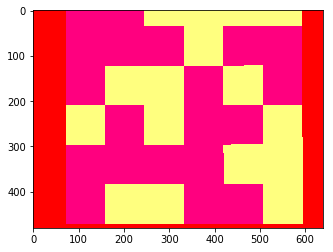

In [30]:
fig, ax = plt.subplots()
img = np.zeros((480, 640, 4))
ax.imshow(img)

res = client.request('vget /camera/0/lit png')
img = read_png(res)
res = client.request('vget /camera/0/object_mask png')
obj_mask = read_png(res)

# print(event.key)
# print('Requested image %s' % str(img.shape))
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

low_red = np.array([-60, 0, 0])
high_red = np.array([40, 1000, 10000])
mask = cv2.inRange(hsv_img, low_red, high_red)
ax.imshow(obj_mask)
fig.canvas.draw()


In [29]:
client.request('vget /objects')

'InstancedFoliageActor_0 SM_MERGED_FloorBad_15 SM_MERGED_FloorGood Brush_1 CameraActor_0 HUD_0 ParticleEventManager_0 PlayerCameraManager_0 GameplayDebuggerCategoryReplicator_0 GameplayDebuggerPlayerManager_0 UnrealcvWorldController_0 BP_Sky_Sphere_C_2 GameNetworkManager_0 GameSession_0 GameStateBase_0 PlayerState_0 WorldSettings_1 PlayerController_0 DirectionalLight_1 Minimal_Default_C_0 AbstractNavData-Default BlockingVolume_7 BlockingVolume2 BlockingVolume3 BlockingVolume4 GlobalPostProcessVolume mygamemode_C_0 testpawn_C_0 PlayerStartPIE_0 DefaultPhysicsVolume_0 '

In [31]:
client.request('vget /cameras')

'PawnSensor '